# COMPASS Collaboration data visualization
## Transverse-momentum-dependent Multiplicities of Charged Hadrons
### Penn State Berks PHYS_296 Fall 2017 
#### *Zackary Scalyer* Adviser *Dr. Alexey  Prokudin*

In [1]:
# importing modules
import os 
import pandas as pd 
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np
import string
# enable inline plotting
%matplotlib inline 

## Preserving origin working directory

In [2]:
# Note: only run this cell one time
origin = os.getcwd() # save current dir
print "This file working dir is  %s" % origin # check current dir
print 'This file is to be opened in the PSU-PHYS296 folder Python/notebooks/'

This file working dir is  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\notebooks
This file is to be opened in the PSU-PHYS296 folder Python/notebooks/


# Gathering list of all data sets
## & printing read me

In [3]:
os.chdir(origin) # change dir to origin working dir
current = os.getcwd() # save current dir
print "If you don't know where you are, go back to the begining... \n starting directory is  %s\n" % current # check current dir
os.chdir('../') # move dir back one 
current = os.getcwd() # save current dir
print "Moved Working directory back  %s\n" % current # check current dir

###################
# Widows or linx ##
###################
# dir for readme
path = current+'\\database\\sidis\\' #for Windows
#path = current+'/database/sidis/' # for Linux

os.chdir(path) # change dir
current = os.getcwd() # update current dir
print "Moved Working directory for readme  %s\n" % current # check current dir

# data read me
print 'Printing readme file for all experimental data sets'
with open('README.md') as f:
    for line in f:
        print line
print 'Observe, COMPASS data files are 2001, 2003, 5001, and 5002'
###################
# Widows or linx ##
###################
# dir for data
path = current+'\\expdata\\' #for Windows
#path = current+'/expdata/' # for Linux
os.chdir(path) # update current dir
print "\nMoved Working directory for data  %s" % current # check current dir

# grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "\nData files retrieved: \n%s" % data

If you don't know where you are, go back to the begining... 
 starting directory is  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\notebooks

Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python

Moved Working directory for readme  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\database\sidis

Printing readme file for all experimental data sets
# SIDIS DATABASE



| index | ref          | target   | hadron | obs        | experiment | dependence |

| :--:  | :--:         | :--:     | :--:   | :--:       | :--:       | :--:       |

| 1000  | [link][?]    | proton   | pi+    | M_Hermes   | hermes     | -          |

| 1001  | [link][?]    | proton   | pi-    | M_Hermes   | hermes     | -          |

| 1002  | [link][?]    | proton   | k+     | M_Hermes   | hermes     | -          |

| 1003  | [link][?]    | proton   | k-     | M_Hermes   | hermes     | -          |

| 1004  | [link][?]    | deuteron | pi+    | M_Hermes   | hermes     | -     

## Reading and restructuring data

In [4]:
data5001 = df(read(data[-2])) # from pandas import read_excel as read

# Calculate mesurment error 
data5001["delta"] = np.sqrt(data5001["stat_u"]**2.0+data5001["sys_u"]**2.0) # for error bars

# Binning data
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4] # x-intervals
Q2Bin=[1,1.7,3,7,16,81] # y-intervals

# Creating bins with pandas cut
data5001['xClas'] = pd.cut(data5001['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1))) # xBin as a:h 
data5001['xBin'] = pd.cut(data5001['x'], xBin) # xBin in interval notation

data5001['Q2Clas'] = pd.cut(data5001['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1))) # Q2Bin as A:E
data5001['Q2Bin'] = pd.cut(data5001['Q2'], Q2Bin) # Q2Bin in interval notation

print data5001.head()

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

       ...           col       F2        yp        yh          W2     delta  \
0      ...       compass  0.64392  3.414464 -0.998970  108.268379  0.329795   
1      ...       compass  0.64392  3.414464 -0.914156  108.268379  0.330521   
2      ...       compass  0.64392  3.414464 -0.841657  108.268379  0.291452   
3      ...       compass  0.64392  3.414464 -0.749458  108.268379  0.248476   
4      ...       compass  0.64392  3.414464 -0.696253  108.268379  0.252741   

   xClas         xBin  Q2Clas         Q2Bin 

## Mapping for grouping of bins

In [5]:
# combinations of bins [xBins = a:h, Q2bins = A:E]
groups=[['a','A'],['a','B'], ['b','A'], ['b','B'], ['c','A'], ['c','B'], ['c','C'], ['d','A'], ['d','B'], ['d','C'], ['e','A'],
        ['e','B'], ['e','C'], ['e','D'], ['f','B'], ['f','C'], ['f','D'], ['g','C'], ['g','D'], ['g','E'], ['h','D'], ['h','E']]
# map of ith subplot on 5x8 grid
gridmap=[32,24,33,25,34,26,18,35,27,19,36,28,20,12,29,21,13,22,14,6,15,7]  # for subplot(5,6,gridmap_i)
# subplots with xy-ticks lables shown 
shairYax=[6,12,18,24,32] # subplots with y-axes ticks
shairXax=[15,22,29,32,33,34,35,36] # subplots with x-axes ticks
# stratify each subplot by z
zGroup=data5001.z.unique() # z = [0.2,0.3,0.4,0.6]
#xlim,Q2lim=[0.0,0.4],[0.0,81.0]
Zcolor=["red","green","blue","orange"] # ploting colors 
Zmark=["o","o","o","o"] # ploting markers
Zline=[':','-.','--','-'] # ploting lines

## Loop structure for plotting

In [6]:
# for testing
for group,grid in zip(range(len(groups)),gridmap):#zip merges >= 2 list into one interable set
    print groups[group][0]
    print groups[group][1]
    print grid
    for z in zGroup:
        print z


a
A
32
0.2
0.3
0.4
0.6
a
B
24
0.2
0.3
0.4
0.6
b
A
33
0.2
0.3
0.4
0.6
b
B
25
0.2
0.3
0.4
0.6
c
A
34
0.2
0.3
0.4
0.6
c
B
26
0.2
0.3
0.4
0.6
c
C
18
0.2
0.3
0.4
0.6
d
A
35
0.2
0.3
0.4
0.6
d
B
27
0.2
0.3
0.4
0.6
d
C
19
0.2
0.3
0.4
0.6
e
A
36
0.2
0.3
0.4
0.6
e
B
28
0.2
0.3
0.4
0.6
e
C
20
0.2
0.3
0.4
0.6
e
D
12
0.2
0.3
0.4
0.6
f
B
29
0.2
0.3
0.4
0.6
f
C
21
0.2
0.3
0.4
0.6
f
D
13
0.2
0.3
0.4
0.6
g
C
22
0.2
0.3
0.4
0.6
g
D
14
0.2
0.3
0.4
0.6
g
E
6
0.2
0.3
0.4
0.6
h
D
15
0.2
0.3
0.4
0.6
h
E
7
0.2
0.3
0.4
0.6


# Figure 1:
## f(values)=qT2 | g(xBin)=Q2Bin

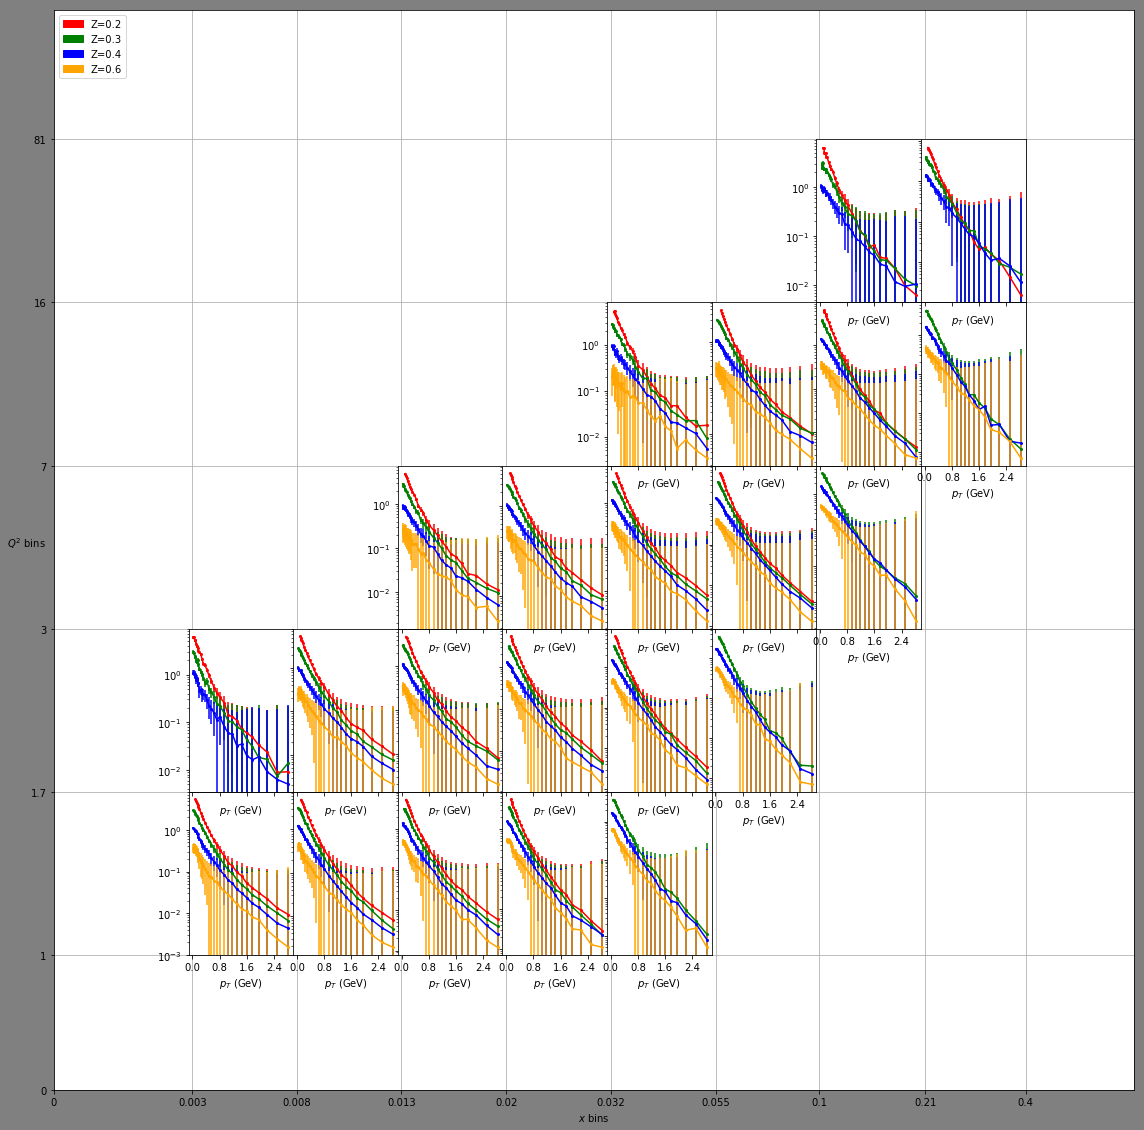

In [7]:
# initialize the figure
fig=plt.figure(figsize=(15,15),facecolor="gray") # figsize; wxh in inches
globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
# 5x8 subplot grid in a 1x1 plot
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) 

# figure properties: 
ax=fig.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9]) # xy-ticks marks / grid lines:
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805]) # guess and check method: ginput() not working for 2.7 -_-
ax.set_xticklabels([0]+xBin) # xy-tick lables 
ax.set_yticklabels([0]+Q2Bin) 
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.grid() # grid on

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='Z=0.2') # lables in legend
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='Z=0.3')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='Z=0.4')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='Z=0.6')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left') # the legend

for group,grid in zip(range(len(groups)),gridmap): # zip >= 2 list as one iterable list
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1])) # subset of data for each subplot
    k=0 #counter
    for z in zGroup: # stratify each subplot by z 
        ax = fig.add_subplot(innerGrid[grid]) # subplot(5,8,grid in gridmap)
        ax.xaxis.set_major_locator(plt.MaxNLocator(4)) # limit number of tics in subplot x-ax to 4
        ax.set_yscale("log") # set y-ax log scale
        ax.errorbar(data_bin.pT2[data_bin.z==z],data_bin.value[data_bin.z==z], # x,y
                    data_bin.delta[data_bin.z==z],# errorbars
                    color=Zcolor[k],marker=Zmark[k],markersize=2)# line properties
        if grid not in shairYax: # if the subplot was not predetermed to have y-axis shown,
            ax.set_yticklabels('') # then do not show y-tick lables
        if grid not in shairXax: # if the subplot was not predetermed to have x-axis shown,
            ax.set_xticklabels('') # than do not show x-tick lables
        ax.set_xlabel(r"$p_T$ (GeV)") # x lable for subplots
        k+=1 #add one to counter



## Dictionary of data by each subplot
### Purpose: to ensure the correct data is plotted in the correct subplot space

In [8]:
compas={} # Initilise dictionary for subplot data 
compasZ={} # Initilise dictionary for subplot axies
k=0 # counter for kth subplot
for group,grid in zip(range(len(groups)),gridmap):  # zip >= 2 list as one iterable list
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1])) # subset of data
    compas['%s,%s,%s' %(k,group,grid)]=data_bin # adding key as (k,group,grid) and value as dataframe to compas dictionary 
    for z in zGroup:
        compasZ['%s,%s,%s,%s' %(k,group,grid,z)]=data_bin # adding key as (k,group,grid,z) and value as dataframe to compasZ
    k+=1 #add one to counter

## Plot of positions only

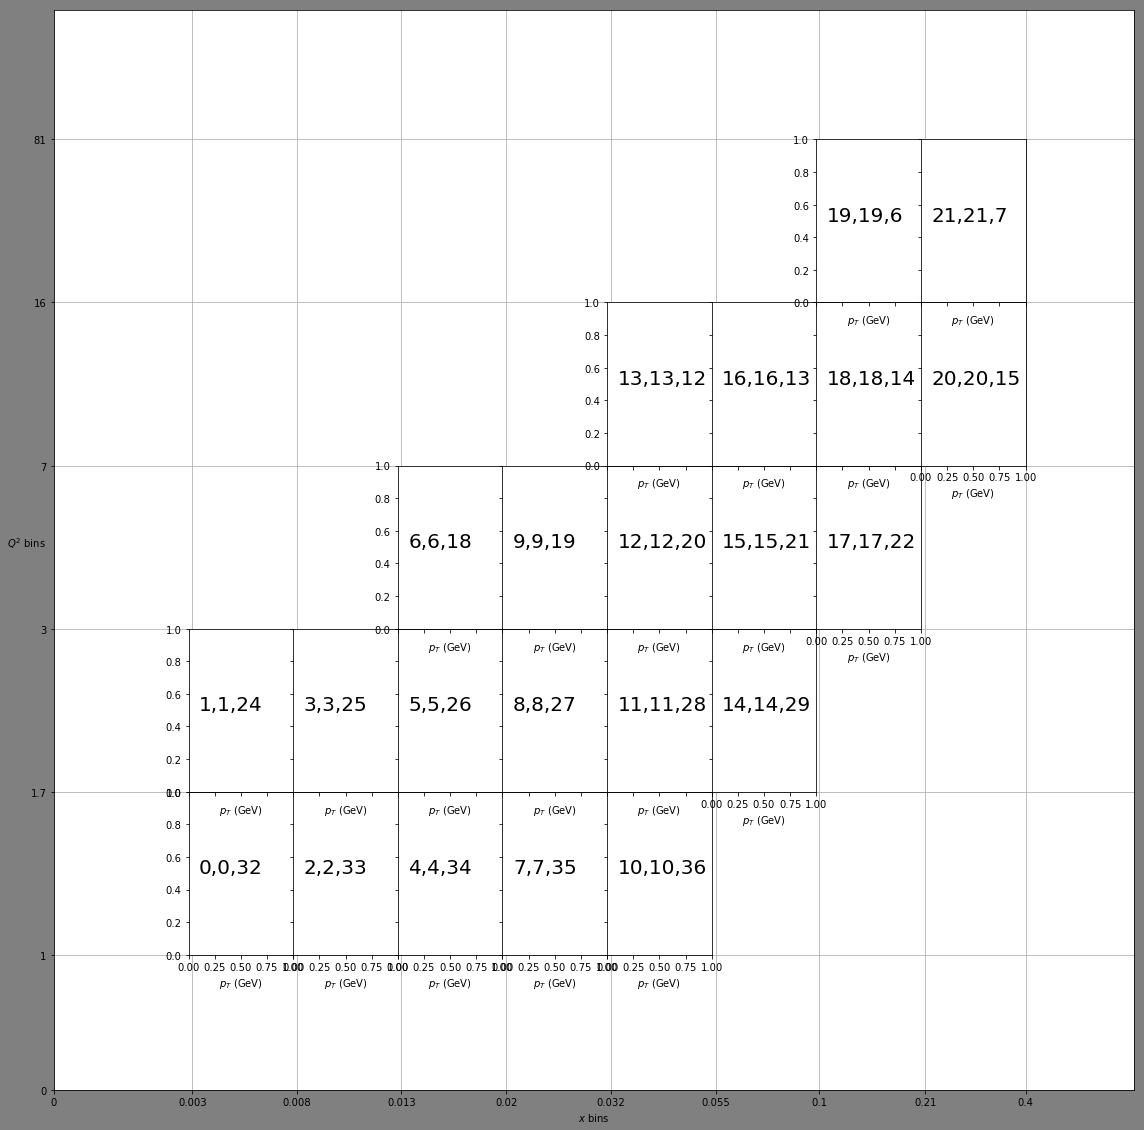

In [9]:
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize; wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) # Figure for subplot matrix as 1x1 matrix:
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # subplot grid


# Figure properties Could be dictionary?
ax=fig.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9]) # xy-ticks marks / grid lines:
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805]) # guess and check method: ginput() not working for 2.7 -_-
ax.set_xticklabels([0]+xBin) # xy-tick lables 
ax.set_yticklabels([0]+Q2Bin) 
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.grid() # grid on

k=0 # count
for group,grid in zip(range(len(groups)),gridmap): # zip >= 2 list as one iterable list
    ax = fig.add_subplot(innerGrid[grid]) # subplot(5,8,grid in gridmap): Note! gridmap may be ploting wrong bins in sub-space
    ax.xaxis.set_major_locator(plt.MaxNLocator(4)) # limit number of tics in x subplot ax to 4
    ax.text(0.1, 0.5, '%s,%s,%s' %(k,group,grid), fontsize=20) # plt.test(x/100,y/100,str('k','group','grid'))
    if grid not in shairXax: # if grid in gridmap not in list of shairXYax than xy-ticklables not shown
        ax.set_xticklabels('')
    if grid not in shairYax: 
        ax.set_yticklabels('')
    ax.set_xlabel(r"$p_T$ (GeV)") # xlab for subplot space
    k+=1 # add

## Checking bins in subspace

In [10]:
print 'Subplot space'
print ('k','group','grid')
print 'where,\n   k-counter for kth subplot\n   0:21'
print '   group-combinations of bins [xBins = a:h, Q2bins = A:E] \n%s \n   grid-map of kth subplot on 5x8 grid  \n%s' %(groups,gridmap)
print ''
print ''
print 'Show x and Q2 bins in each subplot and the interval they are on \n'  

for k,group,grid in zip(range(22),range(len(groups)),gridmap):
    print 'compas[%s,%s,%s]' %(k,group,grid)
    print '  xBin = %s \n   on %s' %(groups[group][0],compas['%s,%s,%s' %(k,group,grid)].xBin.unique())
    print '  Q2Bin = %s \n   on %s' %(groups[group][1],compas['%s,%s,%s' %(k,group,grid)].Q2Bin.unique())
    print ''



Subplot space
('k', 'group', 'grid')
where,
   k-counter for kth subplot
   0:21
   group-combinations of bins [xBins = a:h, Q2bins = A:E] 
[['a', 'A'], ['a', 'B'], ['b', 'A'], ['b', 'B'], ['c', 'A'], ['c', 'B'], ['c', 'C'], ['d', 'A'], ['d', 'B'], ['d', 'C'], ['e', 'A'], ['e', 'B'], ['e', 'C'], ['e', 'D'], ['f', 'B'], ['f', 'C'], ['f', 'D'], ['g', 'C'], ['g', 'D'], ['g', 'E'], ['h', 'D'], ['h', 'E']] 
   grid-map of kth subplot on 5x8 grid  
[32, 24, 33, 25, 34, 26, 18, 35, 27, 19, 36, 28, 20, 12, 29, 21, 13, 22, 14, 6, 15, 7]


Show x and Q2 bins in each subplot and the interval they are on 

compas[0,0,32]
  xBin = a 
   on [(0.003, 0.008]]
Categories (1, interval[float64]): [(0.003, 0.008]]
  Q2Bin = A 
   on [(1.0, 1.7]]
Categories (1, interval[float64]): [(1.0, 1.7]]

compas[1,1,24]
  xBin = a 
   on [(0.003, 0.008]]
Categories (1, interval[float64]): [(0.003, 0.008]]
  Q2Bin = B 
   on [(1.7, 3.0]]
Categories (1, interval[float64]): [(1.7, 3.0]]

compas[2,2,33]
  xBin = b 
   on